In [108]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors


import scienceplots
plt.style.use(["science", "no-latex"])

from cmap import Colormap
cmap = Colormap('crameri:batlow').to_mpl()

In [12]:
burgerslm_time = np.load("burgerslm_time.npy")
burgerslm_l2err = np.load("burgerslm_l2err.npy")
burgerslm_loss = np.load("burgerslm_loss.npy")
burgerslm_lambda = np.load("burgerslm_lambda.npy")
burgerslm_searchdirnorm = np.load("burgerslm_searchdirnorm.npy")
burgerslm_svs = np.load("burgerslm_svs.npy")
burgerslm_u_pred = np.load('burgerslm_u_pred.npy')
burgerslm_u_solution = np.load('burgerslm_u_solution.npy')
burgerslm_X = np.load('burgerslm_X.npy')
burgerslm_T = np.load('burgerslm_T.npy')


burgersBFGS_time = np.load("burgersBFGS_time.npy")
burgersBFGS_l2err = np.load("burgersBFGS_l2err.npy")
burgersBFGS_loss = np.load("burgersBFGS_loss.npy")
burgersBFGS_searchdirnorm = np.load("burgersBFGS_searchdirnorm.npy")
burgersBFGS_u_pred = np.load('burgersBFGS_u_pred.npy')
burgersBFGS_u_solution = np.load('burgersBFGS_u_solution.npy')
burgersBFGS_X = np.load('burgersBFGS_X.npy')
burgersBFGS_T = np.load('burgersBFGS_T.npy')

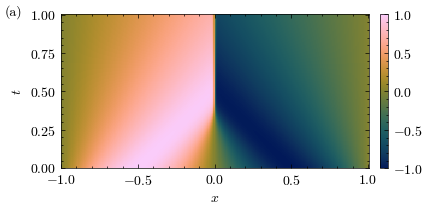

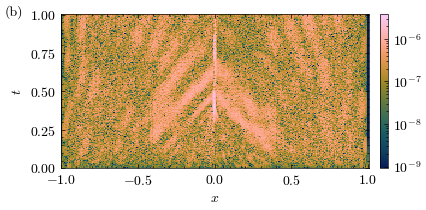

In [120]:
fig, ax = plt.subplots(figsize=(5, 2))
ax.set_aspect("equal")
ax_nn = ax.pcolormesh(burgerslm_X, burgerslm_T, burgerslm_u_pred, cmap=cmap, rasterized=True,
                      vmin=-1,vmax=1)
fig.colorbar(ax_nn, ax=ax, pad=0.03)
ax.annotate("(a)", xy=(0, 1), xycoords='axes fraction',
            xytext=(-40, 7), textcoords='offset points',
            ha='left', va='top',
            bbox=dict(facecolor='white', alpha=1.0, linewidth=0))
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")
fig.savefig("burgers_lm.pdf", format="pdf")
plt.show()


error = np.abs(burgerslm_u_solution - burgerslm_u_pred)
rel_l2_error = np.linalg.norm(error) / np.linalg.norm(burgerslm_u_solution)


norm = colors.LogNorm(vmin=error.min() + 9e-10, vmax=error.max())
fig, ax = plt.subplots(figsize=(5, 2))
ax.set_aspect("equal")
nn_error = ax.pcolormesh(burgerslm_X, burgerslm_T, np.abs(error) + 1e-10, norm=norm, cmap=cmap, rasterized=True,)
fig.colorbar(nn_error, ax=ax, pad=0.03)
ax.annotate("(b)", xy=(0, 1), xycoords='axes fraction',
            xytext=(-40, 7), textcoords='offset points',
            ha='left', va='top',
            bbox=dict(facecolor='white', alpha=1.0, linewidth=0))
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")
fig.savefig("burgers_lm_err.pdf", format="pdf")
plt.show()

/tmp/ipykernel_35742/2728407887.py:61: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


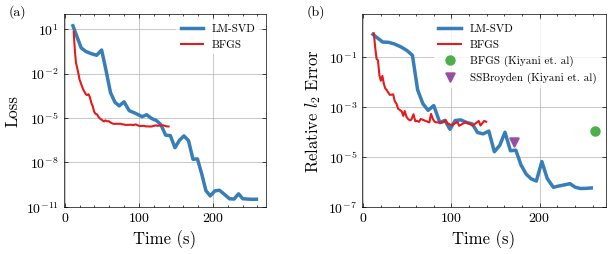

In [126]:
# plt.figure(figsize=(4, 3))
# plt.plot(burgerslm_loss, color='b', linestyle='-', linewidth=2)
# plt.yscale('log')
# plt.xlabel('Iterations', fontsize=14)
# plt.ylabel(r'Loss', fontsize=14)
# plt.grid()
# plt.show


# print(burgerslm_time)

c1 = "#E41A1C"
c2 = "#377EB8"
c3 = "#4DAF4A"
c4 = "#984EA3"

fig = plt.figure(figsize=(7, 2.5))

# Create a GridSpec with 1 row and 3 columns to achieve a 1/3 and 2/3 ratio
gs = gridspec.GridSpec(1, 13, figure=fig)

# Add subplots to the figure using the GridSpec
# The left plot occupies the first column (1/3 width)
ax1 = fig.add_subplot(gs[0, 0:5])
# The right plot occupies the remaining two columns (2/3 width)
ax2 = fig.add_subplot(gs[0, 7:])

# --- Plot 1: Loss vs. Time ---
ax1.plot(burgerslm_time, burgerslm_loss, color=c2, linestyle='-', linewidth=2.5, label="LM-SVD")
ax1.plot(burgersBFGS_time[~np.isnan(burgersBFGS_loss)][::4], burgersBFGS_loss[~np.isnan(burgersBFGS_loss)][::4],
         color=c1, linestyle='-', linewidth=1.5, label="BFGS")
ax1.set_yscale('log')
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel(r'Loss', fontsize=12)
ax1.legend(fontsize=8, facecolor='white', frameon=True, framealpha=0.8, fancybox=True, edgecolor='none')
ax1.grid()
ax1.annotate("(a)", xy=(0, 1), xycoords='axes fraction',
             xytext=(-40, 7), textcoords='offset points',
             ha='left', va='top',
             bbox=dict(facecolor='white', alpha=1.0, linewidth=0))
ax1.set_ylim([1e-11, 1e2])

# --- Plot 2: Relative l2 Error vs. Time ---
ax2.plot(burgerslm_time, burgerslm_l2err, color=c2, linestyle='-', linewidth=2.5, label="LM-SVD")
ax2.plot(burgersBFGS_time[::4], burgersBFGS_l2err[::4], color=c1, linestyle='-', linewidth=1.5, label="BFGS")
ax2.scatter(263, 1.04e-4, color=c3, marker="o", linewidth=1.5, label="BFGS (Kiyani et. al)")
ax2.scatter(171, 4.04e-5, color=c4, marker="v", linewidth=1.5, label="SSBroyden (Kiyani et. al)")
ax2.set_yscale('log')
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel(r'Relative $l_2$ Error', fontsize=12)
ax2.legend(fontsize=8, facecolor='white', frameon=True, framealpha=0.8, fancybox=True, edgecolor='none')
ax2.grid()
ax2.annotate("(b)", xy=(0, 1), xycoords='axes fraction',
             xytext=(-40, 7), textcoords='offset points',
             ha='left', va='top',
             bbox=dict(facecolor='white', alpha=1.0, linewidth=0))
ax2.set_ylim([1e-7, 5e0])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.35)
plt.tight_layout()

# Save the figure as a PDF
plt.savefig("burgers_losses.pdf", format="pdf")
plt.show()

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 2.5))

# ax1.plot(burgersBFGS_time[~np.isnan(burgersBFGS_loss)][::4], burgersBFGS_loss[~np.isnan(burgersBFGS_loss)][::4], color=c1, linestyle='-', linewidth=2, label="BFGS")
# ax1.plot(burgerslm_time, burgerslm_loss, color=c2, linestyle='--', linewidth=2, label="LM-SVD")
# ax1.set_yscale('log')
# ax1.set_xlabel('Time (s)', fontsize=12)
# ax1.set_ylabel(r'Loss', fontsize=12)
# ax1.legend(fontsize=8, facecolor='white', frameon=True, framealpha=0.8, fancybox=True, edgecolor='none')
# ax1.grid()
# ax1.annotate("(a)", xy=(0, 1), xycoords='axes fraction',
#             xytext=(-40, -7), textcoords='offset points',
#             ha='left', va='top',
#             bbox=dict(facecolor='white', alpha=1.0, linewidth=0))
# ax1.set_ylim([1e-11, 1e2])

# ax2.plot(burgersBFGS_time[::4], burgersBFGS_l2err[::4], color=c1, linestyle='-', linewidth=2, label="BFGS")
# ax2.plot(burgerslm_time, burgerslm_l2err, color=c2, linestyle='--', linewidth=2, label="LM-SVD")
# ax2.scatter(263, 1.04e-4, color=c3, marker="o", linewidth=2, label="BFGS (Kiyani et. al)")
# ax2.scatter(171, 4.04e-5, color=c4, marker="v", linewidth=2, label="SSBroyden (Kiyani et. al)")
# ax2.set_yscale('log')
# ax2.set_xlabel('Time (s)', fontsize=12)
# ax2.set_ylabel(r'Relative $l_2$ Error', fontsize=12)
# ax2.legend(fontsize=8, facecolor='white', frameon=True, framealpha=0.8, fancybox=True, edgecolor='none')
# ax2.grid()
# ax2.annotate("(b)", xy=(0, 1), xycoords='axes fraction',
#             xytext=(-40, -7), textcoords='offset points',
#             ha='left', va='top',
#             bbox=dict(facecolor='white', alpha=1.0, linewidth=0))
# ax2.set_ylim([1e-7, 5e0])

# plt.subplots_adjust(wspace=5) 
# plt.tight_layout()
# plt.show
# fig.savefig("burgers_losses.pdf", format="pdf")

In [9]:
print(burgerslm_l2err[-1])

9.557610694701962e-07
